Predicting Restaurant Food Cost


Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.



# Data processing

In [2]:
#importing the required libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading nthe dataset
df=pd.read_excel("Data_Train.xlsx")

In [4]:
#lets see insights of the data sets
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [5]:
df.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


In [6]:
#cheking the columns
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

FEATURES:
TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.



# Exploring data

In [7]:
#cheking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [8]:
#cheking null values
print(df.isnull().sum())

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64


In [9]:
#cheking shape
df.shape

(12690, 9)

In [10]:
#checking the data types
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [11]:
#Observation
#This data set has total 2690 rows and 9 columns
#null values are present target variable has data type int64 rest all has object

# Summary statistics

In [12]:
df.describe(include="all")

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12690,12690.000000,12690,12690,12578,12592,12688,11486,12690.000000
unique,113,NaN,4155,2689,359,1416,32,1847,NaN
top,QUICK BITES,NaN,South Indian,11am – 11pm (Mon-Sun),Chennai,Gachibowli,3.9,44 votes,NaN
freq,4218,NaN,532,1415,2174,166,1238,71,NaN
mean,NaN,7759.134121,NaN,NaN,NaN,NaN,NaN,NaN,655.252246
std,NaN,4504.874150,NaN,NaN,NaN,NaN,NaN,NaN,627.003540
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,20.000000
25%,NaN,3863.250000,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
50%,NaN,7740.000000,NaN,NaN,NaN,NaN,NaN,NaN,500.000000
75%,NaN,11688.750000,NaN,NaN,NaN,NaN,NaN,NaN,800.000000


In [13]:
#Observations:
    #title has 113 unique features and its has object data type
    #RESTAURANT_ID is in integer data type
    #there are 4155 unique CUISINES
    #2689 unique tmings are present
    #Data is collacted from 359 unique city.and null value is present in 112 rows
    #LOCALITY 1416 different localitysand values of 98 localities are unknown
    #RATING 32 different rating are given and it has 2 null values
    #overall votes recived by returants 1847 unique values and it has 1204 null values
    

# Data pre-processing

In [14]:
#pre-processing of CUISINES
print(df["CUISINES"].value_counts())
#we can see number of CUISINES in each case is different so we can add another column No od CUISINES
df["No of CUISINES"]=df.CUISINES.apply(lambda x:len(x.split(",")))

South Indian                                               532
North Indian                                               526
North Indian, Chinese                                      501
Fast Food                                                  286
Chinese                                                    167
                                                          ... 
Cafe, South Indian, North Indian, Chinese, Continental       1
European, BBQ, Grill                                         1
Asian, Chinese, Thai, Japanese                               1
Continental, Italian, North Indian, Finger Food, German      1
Continental, Italian, Cafe, Beverages, Desserts              1
Name: CUISINES, Length: 4155, dtype: int64


In [15]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,No of CUISINES
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,3
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,3
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,4
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,2
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,1


In [16]:
#pre-processing of Rating
print(df["RATING"].value_counts())
#we can see  that rating has 2 null values and some values are noted as NEW and some are - we need to replace these values
#i am replacing new and nan values with mode and - with 0.00
df["RATING"]=df["RATING"].replace({"NEW":3.9,"-":0.0,np.nan:3.9})

3.9    1238
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: RATING, dtype: int64


In [17]:
#lets cross check
df["RATING"].value_counts()

3.9    1947
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
3.4     575
4.3     556
0.0     495
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
Name: RATING, dtype: int64

<AxesSubplot:xlabel='VOTES', ylabel='Density'>

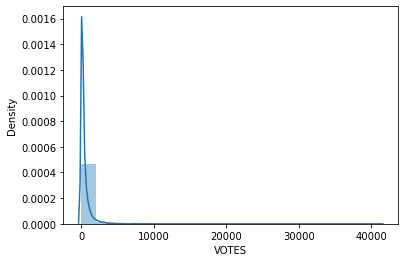

In [18]:
#Extracting Votes
df['VOTES'] = df['VOTES'].str.replace(' votes', '').astype(float)
sns.distplot(df['VOTES'],bins=20)

In [19]:
#Data is skewed so we will replace the null values with median()
df['VOTES']=df['VOTES'].replace({np.nan:df['VOTES'].median()})

In [20]:
#Lets fill the nan values of city and locality
#we will use mode as startagy since these are catagorical values
from sklearn.impute import SimpleImputer
col=["CITY","LOCALITY"]
for col in col:
    si=SimpleImputer(strategy='most_frequent')
    df[col]=si.fit_transform(df[col].values.reshape(-1,1))

In [21]:
#lets encode the catagorical data
col2=["CITY","LOCALITY","TITLE","CUISINES","TIME"]


<AxesSubplot:>

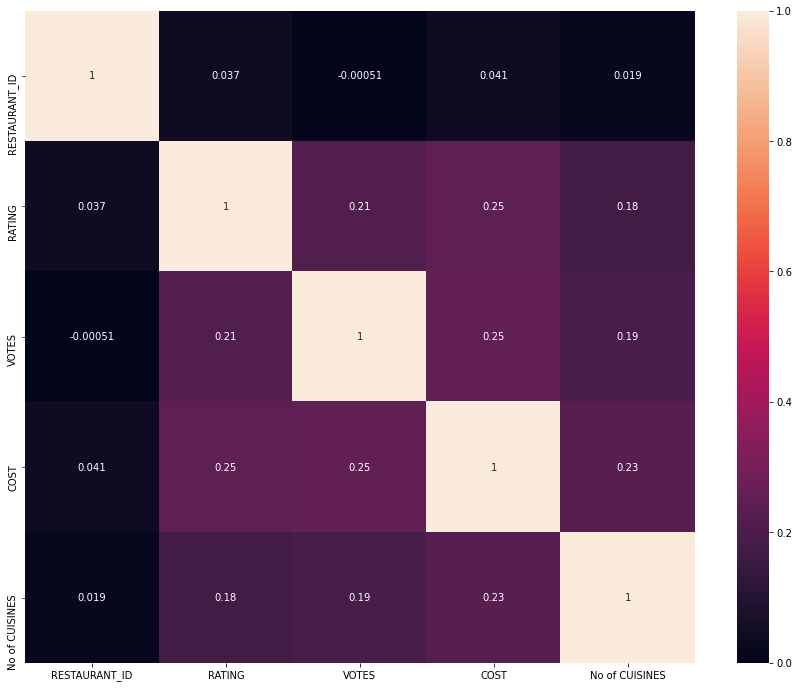

In [22]:
#checking the correlation
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

# Univariant analysis

count    12690.000000
mean       655.252246
std        627.003540
min         20.000000
25%        300.000000
50%        500.000000
75%        800.000000
max      14000.000000
Name: COST, dtype: float64


<AxesSubplot:xlabel='COST'>

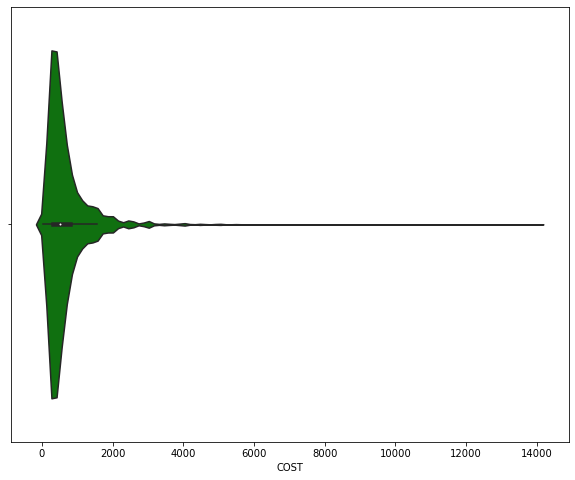

In [23]:
#Analysis of cost
print(df["COST"].describe())
plt.figure(figsize=(10,8))
sns.violinplot(df["COST"],color="g")

In [24]:
#Average cost for 2 people in resturants is 655.252246
#maximum cost is 14000,minimum is 20
#cost for 2 people in more than 75% of the resturants is below 1000


count    12690.000000
mean         3.644192
std          0.837278
min          0.000000
25%          3.500000
50%          3.800000
75%          4.000000
max          4.900000
Name: RATING, dtype: float64
most frequnt rating 0    3.9
dtype: float64


<AxesSubplot:xlabel='RATING', ylabel='Density'>

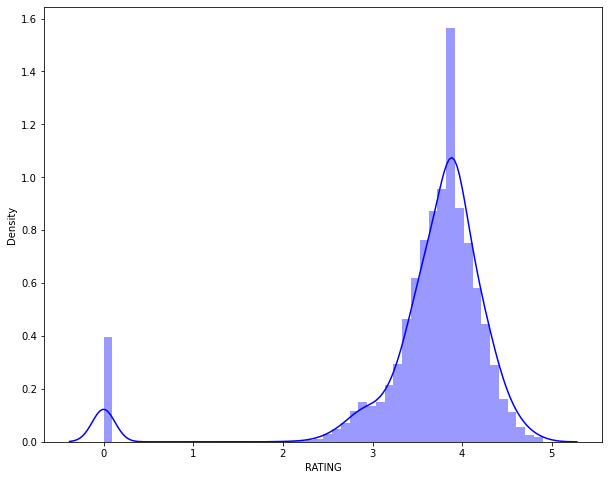

In [25]:
#Analysis of Rating
print(df["RATING"].describe())
print("most frequnt rating",df["RATING"].mode())
plt.figure(figsize=(10,8))
sns.distplot(df["RATING"],color="b")

In [26]:
#Average ratings of resuturants in 3.6
#75% most of the ratings lies below 4.0
#most frequent rating is 3.9 followed by 3.8
#maximum rating is 4.9 minimum is 0


count    12690.000000
mean         2.552088
std          1.357230
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: No of CUISINES, dtype: float64
most frequnt No of CUISINES 0    2
dtype: int64


<AxesSubplot:xlabel='No of CUISINES', ylabel='count'>

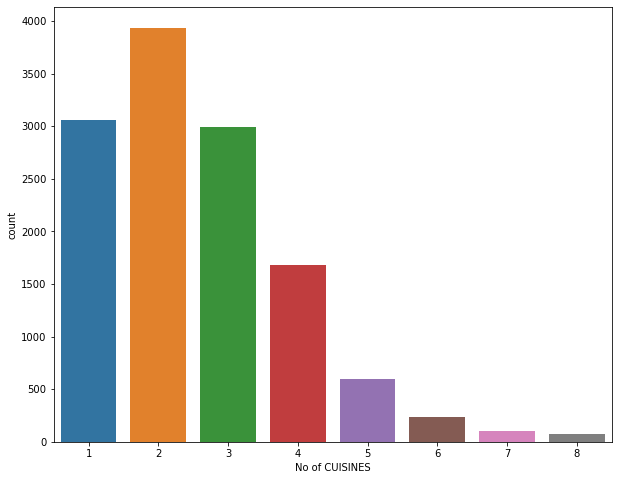

In [27]:
#Analysis of Nuber of "CUISINES"
print(df["No of CUISINES"].describe())
print("most frequnt No of CUISINES",df["No of CUISINES"].mode())
plt.figure(figsize=(10,8))
sns.countplot(df["No of CUISINES"])

In [28]:
#most frequent no of cuisines is 2 followed by 1
#maximum no of cuisinesis 8 minimum is 1

most frequent city 0    Chennai
dtype: object
top 10 citys with highest resturants Chennai         2286
Bangalore       2149
Hyderabad       1819
Mumbai          1722
New Delhi       1321
Kochi           1279
Gurgaon          379
Secunderabad     310
Noida            211
Navi Mumbai      165
Name: CITY, dtype: int64


<AxesSubplot:ylabel='CITY'>

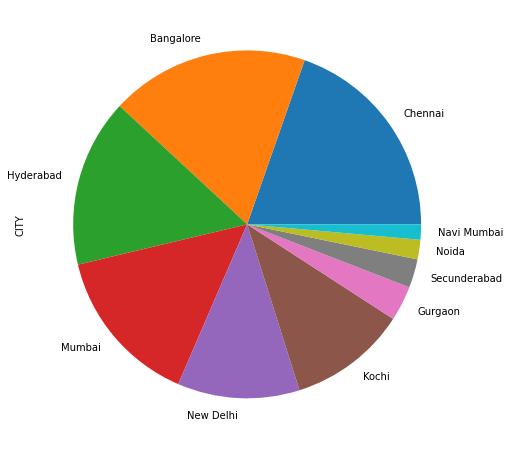

In [29]:
#Analysis of number of resturants in city top 10
print("most frequent city",df["CITY"].mode())
df2=df["CITY"].value_counts()
print("top 10 citys with highest resturants",df2.sort_values(ascending=False).head(10))
plt.figure(figsize=(10,8))
df2.head(10).plot(kind='pie')

In [30]:
#From the chart we can see most number of resturanst are from banglore followed by hydrabad

# Bi-Variant analysis


CITY
Banglaore                  3000.000000
Chennai Thousand Lights    2500.000000
Kerala 682304              2200.000000
Chennai Teynampet          2166.666667
Ulsoo                      2000.000000
Malleshwaram Bangalore     2000.000000
Chennai Mahabalipuram      1850.000000
Gurgoan                    1800.000000
Khar (west)                1700.000000
Grant Road West            1600.000000
Name: COST, dtype: float64


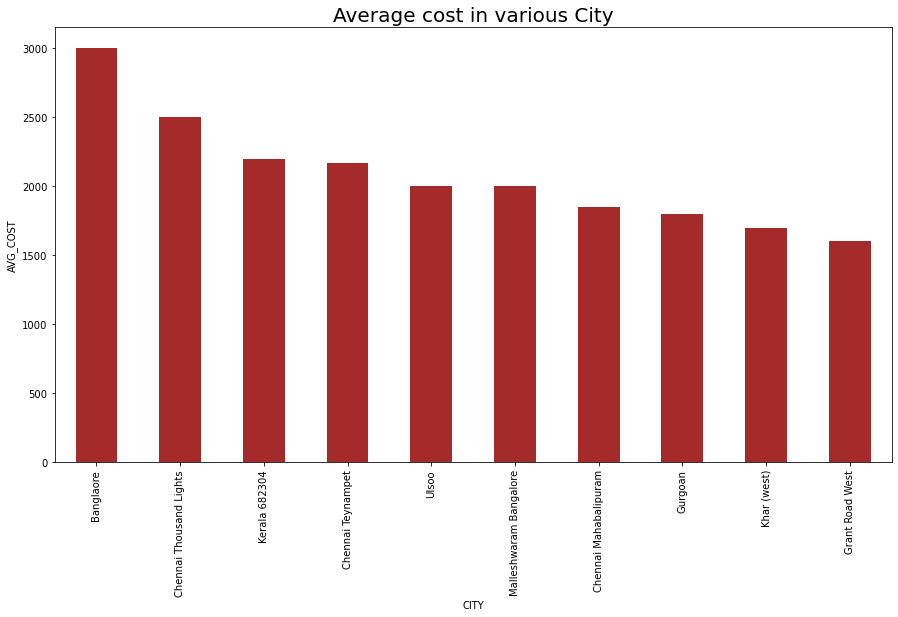

In [31]:
#Analysis of cost in various city
df3=df.groupby("CITY").mean()["COST"].sort_values(ascending=False)
print(df3.head(10))
plt.figure(figsize=(15,8))
df3.head(10).plot(kind='bar',color='brown')
plt.xlabel("CITY")
plt.ylabel("AVG_COST")
plt.title("Average cost in various City",fontsize=20)
plt.show()

In [32]:
#Among the top 10 cities average cost for 2 people is high at banglore

CITY
Malleshwaram Bangalore                 4.9
chennai                                4.7
opp mukteshwar ashram powai            4.7
Hitech City                            4.6
Beside Excellency Gardens              4.6
Chennai 600034.                        4.6
Bangalore Koramangala 7th Block        4.5
Dist. Center New Delhi                 4.5
Andheri west Mumbai                    4.5
Chennai (Bang Opposite Indian Bank)    4.5
Gurgaon Haryana                        4.4
Telangana 500032                       4.4
Near Sector 110 Noida                  4.4
Thane (W)                              4.4
Greater Kailash 2 New Delhi            4.4
Ashok Nagar                            4.4
Banglaore                              4.4
ECR NEELANKARAI Chennai 600115         4.3
Chennai Thousand Lights                4.3
Gurgoan                                4.3
Name: RATING, dtype: float64


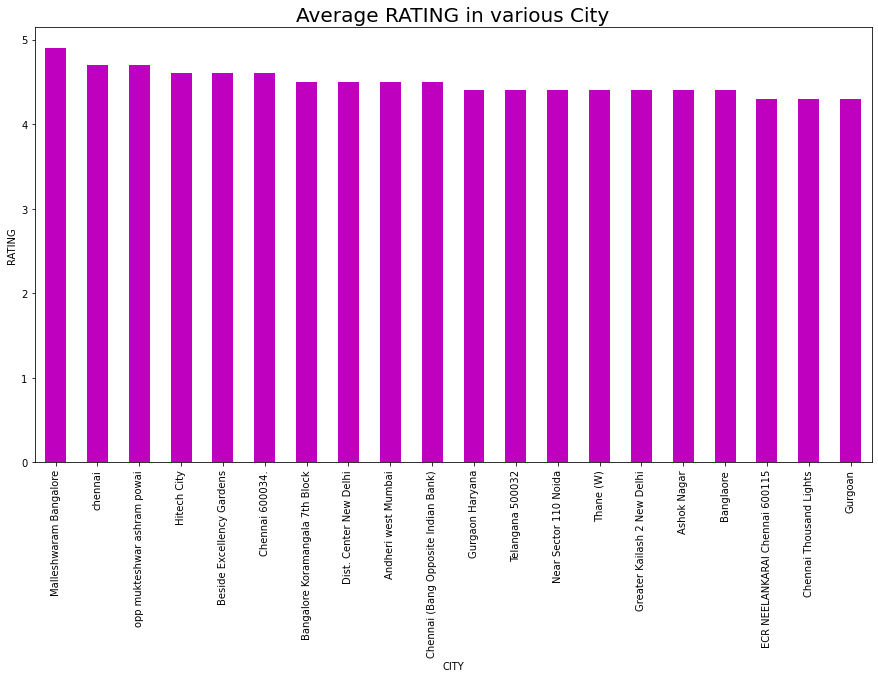

In [33]:
#Analysis of ratings in various top 20 city
df3=df.groupby("CITY").mean()["RATING"].sort_values(ascending=False)
print(df3.head(20))
plt.figure(figsize=(15,8))
df3.head(20).plot(kind='bar',color='m')
plt.xlabel("CITY")
plt.ylabel("RATING")
plt.title("Average RATING in various City",fontsize=20)
plt.show()

In [34]:
# Malleshwaram banglore has highest rating

TITLE
BEVERAGE SHOP,CASUAL DINING     5.000000
BAKERY,CONFECTIONERY           10.000000
KIOSK,QUICK BITES              20.500000
DESSERT PARLOR,PAAN SHOP       29.000000
BEVERAGE SHOP,CAFÉ             34.333333
CONFECTIONERY,QUICK BITES      36.000000
CASUAL DINING,FOOD COURT       36.000000
BAKERY,FOOD COURT              37.000000
CONFECTIONERY                  54.500000
QUICK BITES,FOOD TRUCK         55.000000
Name: VOTES, dtype: float64


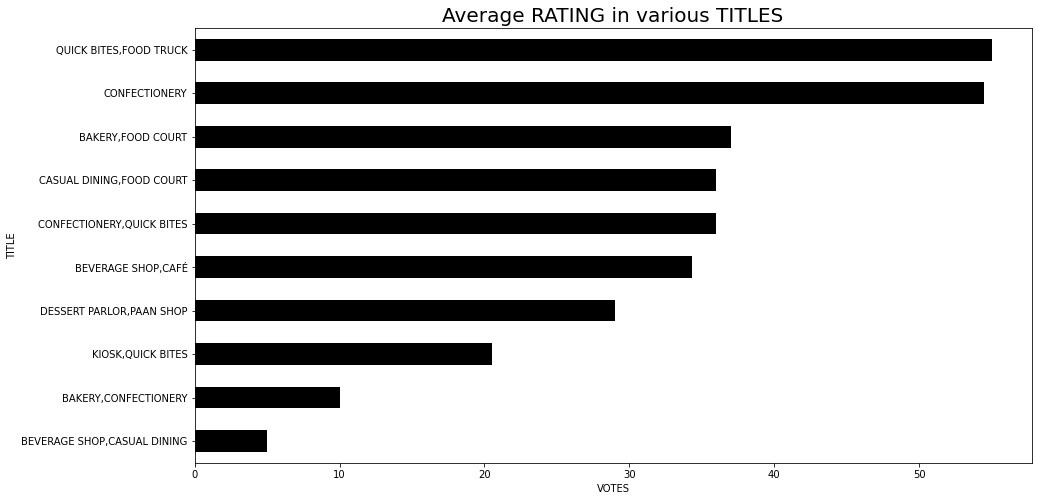

In [35]:
#Analysis of ratings in various top 10 TITLES
df3=df.groupby("TITLE").mean()["VOTES"].sort_values(ascending=True)
print(df3.head(10))
plt.figure(figsize=(15,8))
df3.head(10).plot(kind='barh',color='k')
plt.xlabel("VOTES")
plt.ylabel("TITLE")
plt.title("Average RATING in various TITLES",fontsize=20)
plt.show()

RATING
0.0     320.585859
2.0     700.000000
2.1     916.666667
2.2     650.000000
2.3     485.000000
2.4     653.333333
2.5     554.285714
2.6     572.131148
2.7     494.494382
2.8     446.506849
2.9     478.817204
3.0     450.588235
3.1     405.483871
3.2     419.169173
3.3     411.816438
3.4     423.513043
3.5     449.909209
3.6     481.093586
3.7     523.139963
3.8     558.007563
3.9     587.699024
4.0     794.822566
4.1     890.117521
4.2    1043.983402
4.3    1096.780576
4.4    1183.066298
4.5    1197.738693
4.6    1193.617021
4.7    1184.782609
4.8    1032.812500
4.9    1120.454545
Name: COST, dtype: float64


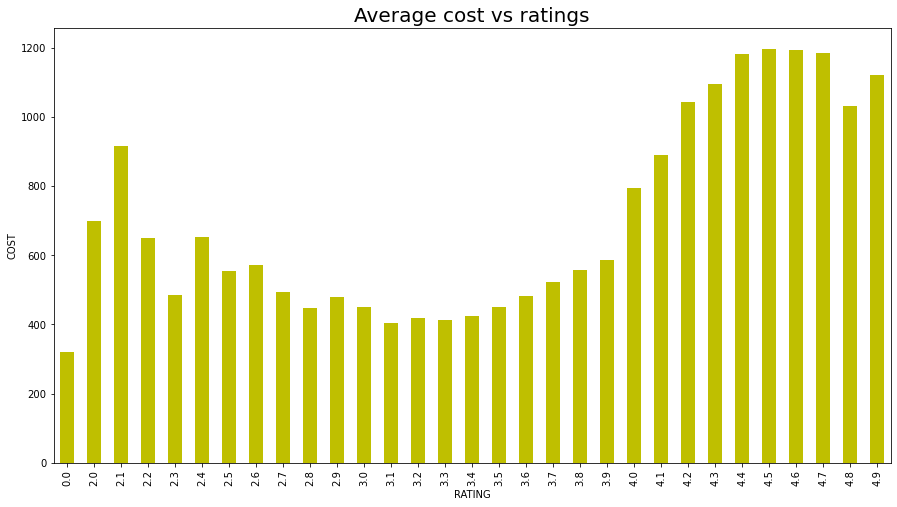

In [36]:
#Aanlysis of cost on various ratings
print(df.groupby(['RATING'])['COST'].mean())
plt.figure(figsize=(15,8))
df.groupby(['RATING'])['COST'].mean().plot(kind='bar',color='y')
plt.xlabel("RATING")
plt.ylabel("COST")
plt.title("Average cost vs ratings",fontsize=20)
plt.show()

In [37]:
#We can see average cost incresess as rating increase.

<Figure size 2160x2160 with 0 Axes>

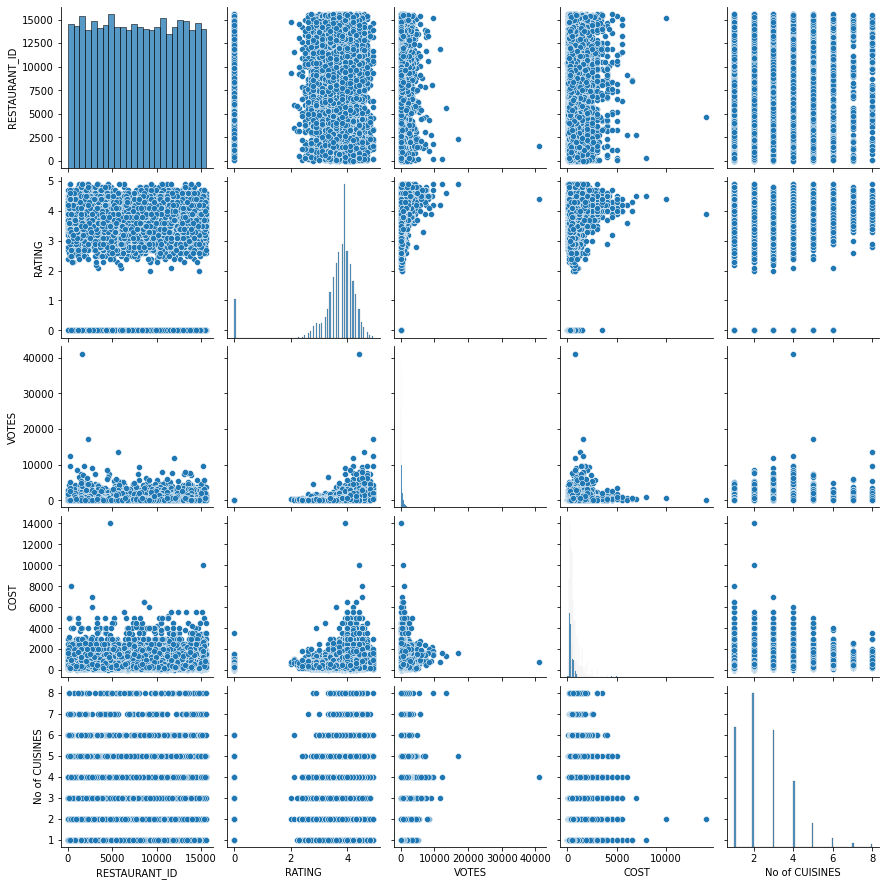

In [38]:
#Lets have look at pair plot
plt.figure(figsize=(30,30))
sns.pairplot(df)

In [39]:
#Now we can see the effects of various variables on cost

# Multi variant analysis

Text(0.5, 1.0, 'chart shows the top 100 costliest resturants for 2 people and thier rating')

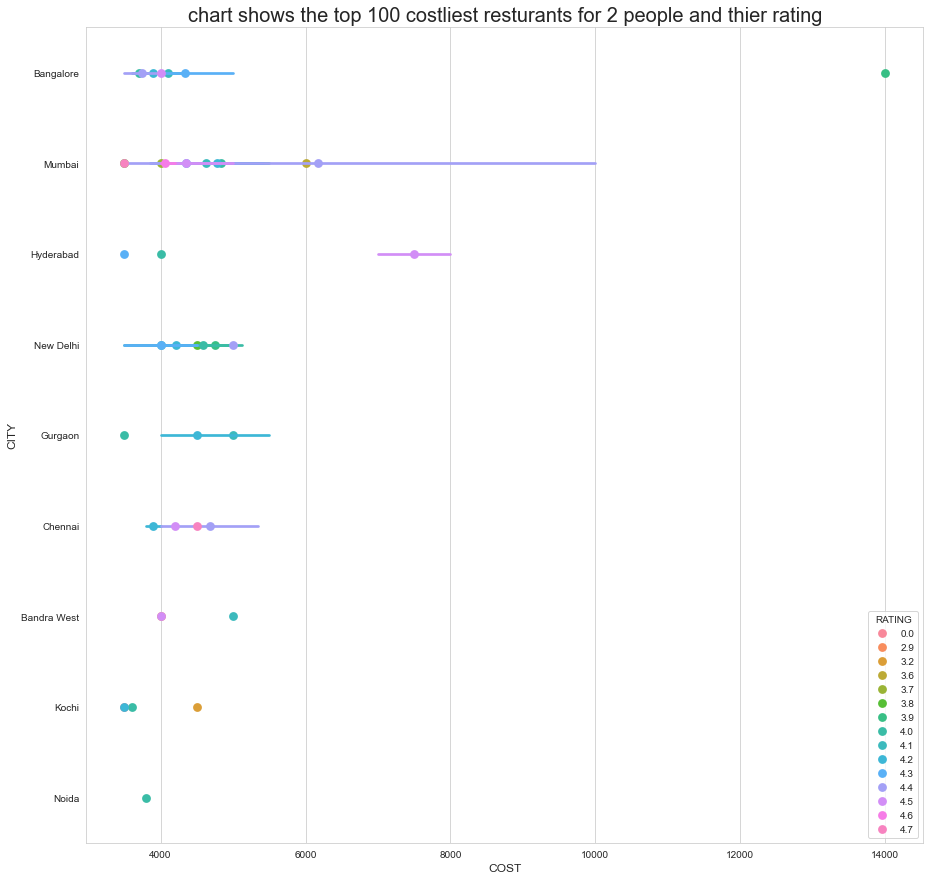

In [40]:
#Anlysis of top 100 costs for 2 people at various cities and for various ratings
df5=df.sort_values(by="COST",ascending=False)
df5=df5.head(100)
plt.figure(figsize=(15,15))
sns.set_style('whitegrid')
sns.pointplot(x='COST', y='CITY', data=df5, hue='RATING',join=False)
plt.xlabel('COST',{'fontsize' : 'large'})
plt.ylabel('CITY',{'fontsize':'large'})
plt.title("chart shows the top 100 costliest resturants for 2 people and thier rating",{'fontsize':20})




In [41]:
#chart shows the top 100 costliest resturants and thier rating
#From the chart we can see the resturant one with the highest cost is in banglore and its rating is 3.8
#In mumbai cost for 2 people is below 8000 and most of them have decent rating of above 4
#In the top 100 costilest resturants for 2 people noida has only 1 resturant and mumbai has the most

RESTAURANT_ID        AxesSubplot(0.125,0.71587;0.168478x0.16413)
RATING            AxesSubplot(0.327174,0.71587;0.168478x0.16413)
VOTES             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
COST              AxesSubplot(0.731522,0.71587;0.168478x0.16413)
No of CUISINES      AxesSubplot(0.125,0.518913;0.168478x0.16413)
dtype: object

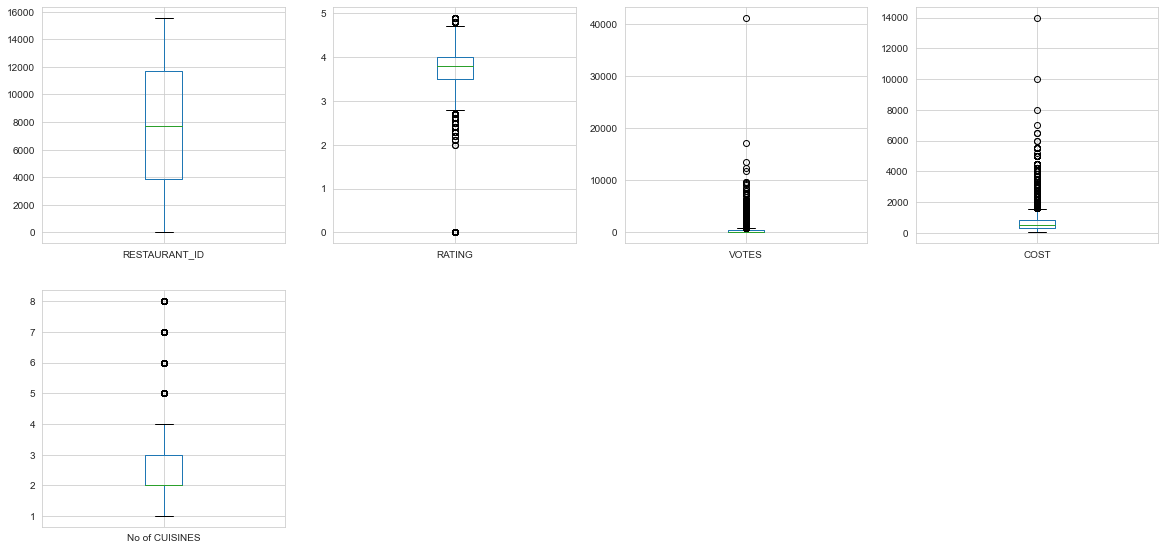

In [42]:
#Cheking the outliers
df.plot(kind="box", subplots=True, layout=(4,4),figsize=(20,20))

In [43]:
#most of the columns have outliers but exept vot and cost all are catagorical data.so we can remove outlier only from votes

In [44]:
#Cheking skewness

df.skew()

RESTAURANT_ID      0.006947
RATING            -3.153828
VOTES             14.788416
COST               3.978801
No of CUISINES     1.040100
dtype: float64

In [45]:
#votes has high skewness, need to be removed

# Data cleaning and transformation

In [46]:
## Label Encoding:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

variable = ['TITLE','CITY','LOCALITY','CUISINES','TIME']
for i in variable:
    df[i] = lb.fit_transform(df[i])

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST', 'No of CUISINES'],
      dtype='object')

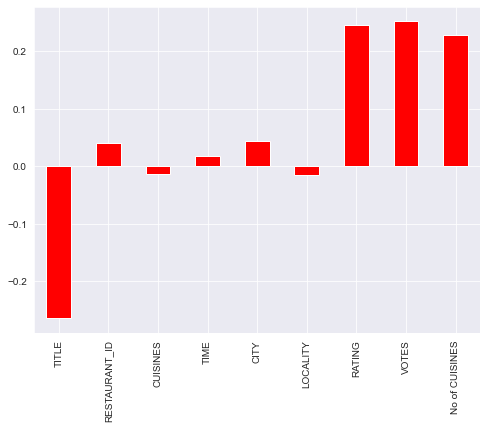

In [47]:
## Checking the correlation of the column with the target variable:
plt.figure(figsize=(8,6))
sns.set_style('dark')
df.drop(['COST'],axis=1).corrwith(df['COST']).plot(kind='bar',grid=True,color='r')
plt.xticks(rotation=90)

df.columns

In [48]:
#we the columns  locality and CUISINES sicnce it has low corelation
df.drop(['TIME'],inplace=True,axis=1)

In [49]:
#lets remove the outliers
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'CITY', 'LOCALITY', 'RATING',
       'VOTES', 'COST', 'No of CUISINES'],
      dtype='object')

In [50]:
#only Votes column is continues variable rest all catagorical variable
#removing the outliers
print(df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df.drop(['TITLE', 'RESTAURANT_ID', 'CITY', 'RATING',
       'No of CUISINES'],axis=1)))
z

(12690, 9)


array([[0.32540837, 0.92054865, 0.42564297, 0.86884552],
       [1.61638078, 0.98623851, 0.44924176, 1.34733058],
       [0.61526483, 1.12404835, 0.21201181, 0.23086546],
       ...,
       [0.12224961, 1.72790605, 0.2686583 , 1.02834054],
       [1.055448  , 0.05359943, 0.44675768, 0.40711461],
       [0.59034881, 1.70535535, 0.35435918, 0.08812458]])

In [51]:
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)
percentage_ofouliers=((12690-12267)/12690)*100

print("using z score percentage of outlier removed:",percentage_ofouliers)

(12267, 9)
using z score percentage of outlier removed: 3.3333333333333335


In [52]:
#Assigning the variables for indipendent and dependent features
x=df_new.drop(labels='COST',axis=1)
y=df_new['COST']


In [53]:
#cheking the skewness
x.skew()

TITLE            -0.081885
RESTAURANT_ID     0.013100
CUISINES         -0.216513
CITY              0.282131
LOCALITY          0.350438
RATING           -3.148886
VOTES             2.645625
No of CUISINES    1.045900
dtype: float64

In [54]:
#Votes has high skewness rest all catagorical variable
#Removeing the skewness
from sklearn.preprocessing import power_transform
x['VOTES'] = np.log1p(x['VOTES'])



In [55]:
#cheking the skewness
x.skew()

TITLE            -0.081885
RESTAURANT_ID     0.013100
CUISINES         -0.216513
CITY              0.282131
LOCALITY          0.350438
RATING           -3.148886
VOTES            -0.138412
No of CUISINES    1.045900
dtype: float64

In [56]:
x.shape

(12267, 8)

# Model Fitting

In [57]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting model:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing error metrices:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [58]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(0,105):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=i
    print("Max score is {} with random state {}".format(max_score,max_state))

In [59]:
model_select(LinearRegression)

Max score is 0.31832499697277195 with random state 103


In [60]:
model_select(KNeighborsRegressor)

Max score is 0.015956430507512054 with random state 2


In [61]:
model_select(DecisionTreeRegressor)

Max score is 0.4598701422210041 with random state 3


In [62]:
model_select(RandomForestRegressor)

Max score is 0.713984507224755 with random state 2


In [63]:
model_select(AdaBoostRegressor)

Max score is 0.42801204780719915 with random state 20


In [64]:
model_select(GradientBoostingRegressor)

Max score is 0.6908133391146956 with random state 20


In [65]:
model_select(Ridge)

Max score is 0.31832422019436923 with random state 103


In [66]:
model_select(Lasso)

Max score is 0.3182062440531187 with random state 103


In [67]:
model_select(ElasticNet)

Max score is 0.307885503450422 with random state 103


In [68]:
#from above model performance we can see that RandomForestRegressor gives best accuracy with random state 2 so lets proceed with that model

In [69]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)
print(x_train.shape, x_test.shape)

(9813, 8) (2454, 8)


In [70]:
cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()

0.6628706464106054

In [71]:
#CV score and r2 score are almost same so we can proced with hyper parameter tuning

In [72]:
#Hyperparameter tuning
rf= RandomForestRegressor()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf, parameters, scoring = make_scorer(r2_score))
grid_cv = grid_cv.fit(x_train,y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestRegressor(max_depth=10, n_estimators=15)

In [73]:
#Now we have got the best estimated state lets train the model

In [75]:
rf = grid_cv.best_estimator_

rf=grid_cv.best_estimator_
rf.fit(x_train,y_train)
print(rf.score(x_train, y_train))

0.753915739115776


In [76]:
predict=rf.predict(x_test)

pd.Series(predict)

0        401.718508
1        376.344563
2        340.575196
3        747.434699
4        561.059899
           ...     
2449    1081.254401
2450     371.456910
2451     431.198295
2452     385.848074
2453     940.751364
Length: 2454, dtype: float64

In [77]:
print("R2 score is "+str(r2_score(y_test,predict)))
print("Mean absolute error is "+str(mean_absolute_error(y_test,predict)))
print("Mean squared error is "+str(mean_squared_error(y_test,predict)))

R2 score is 0.6892719141192823
Mean absolute error is 170.55093284903646
Mean squared error is 63632.93639070121


In [78]:
y_test

2967      400
1960      450
5047      300
12002     850
1349      300
         ... 
11659    1800
258       200
10721     300
3968      250
6397      950
Name: COST, Length: 2454, dtype: int64

Text(0.5, 1.0, 'Predicted y vs y test')

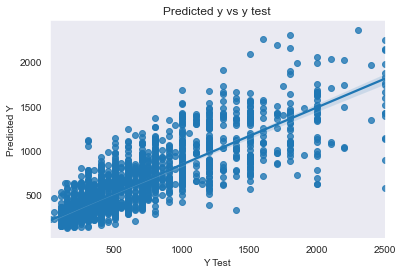

In [84]:
# Plotting the actual y and predicted y
sns.regplot(x=y_test,y=predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title("Predicted y vs y test")

In [85]:
#lets save this model since we have satisfied with the accuracy
#Random forest performs best
#now we can the predict the cost for 2 people based on the atributes values
import pickle

In [86]:
filename="resturant_food_train.pkl"
pickle.dump(rf,open(filename,"wb"))

We have Successfully saved our best model and now we will load the test data and do all the preprocessing and cleaning on our test data and then we will load our saved model from pickle library and apply it on our cleaned test data

In [88]:
#Let's load the test Data 

In [148]:
df_test=pd.read_excel("Data_Test.xlsx")

In [149]:
#Lets have some insighest of data
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [150]:
df_test.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN
4230,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes


In [151]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [152]:
df_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [153]:
df_test.shape

(4231, 8)

In [154]:
df_test.describe(include="all")

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
count,4231,4231.000000,4231,4231,4196,4201,4229,3829
unique,86,NaN,1727,1183,151,834,31,1136
top,QUICK BITES,NaN,"North Indian, Chinese",11am – 11pm (Mon-Sun),Bangalore,Kakkanad,3.8,6 votes
freq,1416,NaN,213,447,686,54,414,30
mean,NaN,7791.438431,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4458.797621,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3908.500000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,7798.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,11634.000000,NaN,NaN,NaN,NaN,NaN,NaN


# DATA cleaning and transforming

In [155]:
#we have null values lets drop the columns which we droped in train data
#we the columns  locality and CUISINES sicnce it has low corelation
df_test.drop(['TIME'],inplace=True,axis=1)

In [156]:
#lets replcae the nan values
#pre-processing of CUISINES
print(df_test["CUISINES"].unique())
# null values
#we can see number of CUISINES in each case is different so we can add another column No od CUISINES
df_test["No of CUISINES"]=df_test.CUISINES.apply(lambda x:len(x.split(",")))

['North Indian, Chinese, Mughlai, Kebab'
 'South Indian, Fast Food, Pizza, North Indian'
 'North Indian, Seafood, Biryani, Chinese' ...
 'North Indian, Chinese, Kebab, Juices' 'Sindhi, Street Food'
 'Rolls, Beverages']


In [157]:
#lets replace the null vaslues of city and locality 
#we will use mode as startagy since these are catagorical values
from sklearn.impute import SimpleImputer
col=["CITY","LOCALITY"]
for col in col:
    si=SimpleImputer(strategy='most_frequent')
    df_test[col]=si.fit_transform(df_test[col].values.reshape(-1,1))

In [158]:
#pre-processing of Rating
print(df_test["RATING"].value_counts())
#we can see  that rating has 2 null values and some values are noted as NEW and some are - we need to replace these values
#i am replacing new and nan values with mode and - with 0.00
df_test["RATING"]=df_test["RATING"].replace({"NEW":3.9,"-":0.0,np.nan:3.9})

3.8    414
3.9    405
4.0    399
3.7    351
3.6    310
4.1    281
4.2    245
NEW    223
3.5    217
3.4    202
4.3    184
-      177
4.4    122
3.3    120
3.2     83
3.1     77
4.5     75
3.0     59
2.9     56
2.8     45
4.6     43
2.7     40
2.6     24
4.7     21
4.8     17
2.5     16
2.4      9
4.9      6
2.3      5
2.2      2
2.1      1
Name: RATING, dtype: int64


In [159]:
#Data is skewed so we will replace the null values with median()
df_test['VOTES'] = df_test['VOTES'].str.replace(' votes', '').astype(float)
df_test['VOTES'] = df_test['VOTES'].fillna(df_test['VOTES'].median())

In [160]:
df_test.isnull().sum()

TITLE             0
RESTAURANT_ID     0
CUISINES          0
CITY              0
LOCALITY          0
RATING            0
VOTES             0
No of CUISINES    0
dtype: int64

In [161]:
## Label Encoding:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

variable = ['TITLE','CITY','LOCALITY','CUISINES']
for i in variable:
    df_test[i] = lb.fit_transform(df_test[i])

In [162]:
#removing the outliers
print(df_test.shape)
from scipy.stats import zscore
z=np.abs(zscore(df_test.drop(['TITLE', 'RESTAURANT_ID', 'CITY', 'RATING',
       'No of CUISINES'],axis=1)))
z

(4231, 8)


array([[0.73156489, 1.18635981, 0.20045797],
       [1.41171242, 0.69133711, 0.43253224],
       [1.05659114, 0.11764796, 0.06884602],
       ...,
       [0.50032472, 1.33112556, 0.44259968],
       [1.22913594, 0.21871952, 0.30039711],
       [0.43462733, 0.83721889, 0.43001538]])

In [164]:
df_new_test=df_test[(z<3).all(axis=1)]
print(df_new_test.shape)
percentage_ofouliers=((4231-4157)/4231)*100

print("using z score percentage of outlier removed:",percentage_ofouliers)

(4157, 8)
using z score percentage of outlier removed: 1.7489955093358545


In [166]:
#Chwking the  new skewness
df_new_test.skew()

TITLE            -0.035717
RESTAURANT_ID     0.001261
CUISINES         -0.208632
CITY              0.088697
LOCALITY          0.310100
RATING           -3.053263
VOTES             2.579778
No of CUISINES    1.102164
dtype: float64

In [171]:
#Assigning the variables for indipendent and dependent features
x_new_test=df_new_test

In [172]:
#Votes has high skewness rest all catagorical variable
#Removeing the skewness
from sklearn.preprocessing import power_transform
x_test['VOTES'] = np.log1p(x_test['VOTES'])


In [173]:
df_new_test.skew()

TITLE            -0.035717
RESTAURANT_ID     0.001261
CUISINES         -0.208632
CITY              0.088697
LOCALITY          0.310100
RATING           -3.053263
VOTES            -0.899229
No of CUISINES    1.102164
dtype: float64

In [174]:
#Let's load the saved model from pickle
filename= pickle.load( open( "resturant_food_train.pkl", "rb" ) )
filename

RandomForestRegressor(max_depth=10, n_estimators=15)

In [175]:
#lets predict the values
test_predict=filename.predict(x_new_test)
test_predict

array([ 887.34612974, 1392.94561856,  627.14988484, ...,  880.30756456,
        661.28690261, 1138.26406758])

In [176]:
pd.DataFrame(test_predict).rename(columns = {0 : 'Cost'}).head()

,Cost
0,887.346130
1,1392.945619
2,627.149885
3,409.129329
4,1035.319623


In [177]:
df_test_final = pd.read_excel("Data_Test.xlsx")

df_TITLE = df_test_final[['TITLE']]

df_test_final = pd.concat([df_TITLE, pd.DataFrame(test_predict).rename(columns = {0 : 'Cost'})], axis=1)

df_test_final

,TITLE,Cost
0,CASUAL DINING,887.346130
1,QUICK BITES,1392.945619
2,CASUAL DINING,627.149885
3,None,409.129329
4,QUICK BITES,1035.319623
...,...,...
4226,CASUAL DINING,NaN
4227,None,NaN
4228,QUICK BITES,NaN
4229,QUICK BITES,NaN


In [178]:
#Let's save the predicted result into the csv file

df_test_final.to_csv('Resturant_cost_tested.csv',index=False)

In [179]:
#now we have tested our data and saved the predicted values